In [1]:
%load_ext jupyter_black

# Interpolación polinomial: Método de Newton

El algoritmo más eficiente para la interpolación con polinomios es el que surge del Método de Newton. En este método, el interpolador lo escribimos asi

\begin{align*}
P_n(x) &= a_0 + (x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + \\
&   +  (x-x_0)(x-x_1)\cdots (x-x_{n-1}) a_n
\end{align*}

Para $n=3$ (cuatro parejas de datos)

\begin{align*}
P_3(x) &= a_0 + (x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \\
&  + (x-x_0)(x-x_1)(x-x_2) a_3 \\
&= a_0 + (x-x_0)\left\{ a_1 + (x-x_1) \left[ a_2 +  (x-x_2) a_3\right] \right\}
\end{align*}

En este caso, podemos evaluar *hacia atrás* de manera recurrente:

\begin{align*}
P_0(x) &= a_3  \\
P_1(x) &= a_2 +  (x-x_2)P_0(x) \\
P_2(x) &= a_1 + (x-x_1)P_1(x) \\
P_3(x) &= a_0 + (x-x_0)P_2(x). 
\end{align*}

De manera que para un valor arbitrario de datos $n$, la relación de recurrencia es

\begin{align*}
P_0(x) &= a_n, \nonumber \\
P_k(x) &= a_{n-k} + (x-x_{n-k})P_{k-1}(x), ~~~~~ k=1,2,\ldots ,n,
\end{align*}

que podemos programar fácilmente como

    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x - xData[n-k])*p
               
donde hemos denotado la coordenada $x$ del arreglo de los datos como *xData*. 

Ahora, ¿cómo obtenemos los coeficientes $a_n$ de los polinomios $P_n$? Tenemos que obligarlos a que pasen por cada dato:

$$
y_i = P_n(x_i) ~~con ~~i=1,2,\ldots ,n
$$

Esta condición nos lleva a necesitar resolver:

\begin{align*}
y_0 &= a_0   \nonumber \\
y_1 &= a_0 +  (x_1-x_0)a_1  \nonumber \\
y_2 &= a_0 +  (x_2-x_0)a_1 +  (x_2-x_0)(x_2-x_1)a_2  \\
    &\vdots & \nonumber \\
y_n &= a_0 +  (x_n-x_0)a_1 + \cdots + (x_n-x_0)(x_n-x_1)\cdots (x_n-x_{n-1}) a_n. \nonumber
\end{align*}

La solución a los coeficientes a partir de este sistema es

\begin{equation*}
a_0=y_0 ~~~ a_1=\nabla y_1  ~~~ a_2=\nabla^2 y_2 \ldots a_n=\nabla^n y_n, 
\end{equation*}

donde hemos usado las **diferencias divididas de Newton** definidas como

\begin{align*}
\nabla y_i &= \frac{y_i - y_0}{x_i - x_0},~~~i=1,2,\ldots ,n \nonumber \\
\nabla^2 y_i &= \frac{\nabla y_i - \nabla y_1}{x_i - x_1},~~~i=2,3,\ldots ,n \nonumber \\
\nabla^3 y_i &= \frac{\nabla^2 y_i - \nabla^2 y_2}{x_i - x_2},~~~i=3,4,\ldots ,n  \\
&\vdots & \nonumber \\
\nabla^n y_n &= \frac{\nabla^{n-1} y_n - \nabla^{n-1} y_{n-1}}{x_n - x_{n-1}}. \nonumber
\end{align*}

Es conveniente calcular los coeficientes en el siguiente orden (para $n=4$):

<div> <img src="../fig/newton.jpg" alt="Drawing" style="width: 300px;"/></div>

ya que los términos de la diagonal del lado derecho de este tablero, son los coeficientes de los polinomios que buscamos.

Si se cambia de órden a la lista de datos, las entradas de la tabla van a cambiar, pero el polinomio resultante será el mismo: el polinomio de grado $n$ que interpola $n+1$ datos es único.



## Algoritmo del cálculo de diferencias divididas

Los cálculos pueden llevarse a cabo con un arreglo unidimensional **a** usando el siguiente algoritmo ($m=n+1$ es el número de datos):

    a = yData.copy()
        for k in range(1,m):
            for i in range(k,m):
                a[i] = (a[i] - a[k-1])/(xData[i] - xData[k-1])
                    
Inicialmente **a** contiene las coordenadas $y$ de los datos, así que es idéntica a la segunda columna de la tabla. Cada iteración sobre el ciclo externo genera las entradas en la siguiente columna, que sobreescriben los elementos de **a** correspondientes. Entonces al final **a** contiene los términos de la diagonal, i.e. los coeficientes del polinomio.

Dados los arreglos de datos **xData** y **yData**, la función **coeffts** regresa el arreglo de coeficientes **a**. Una vez que se encuentran los coeficientes, el interpolante $P_n(x)$ puede ser evaluado en cualquier valor de $x$ con la función **evalPoly**.

In [2]:
# Método de interpolación de Newton


def evalPoly(a, xData, x):  # Función que evalua polinomios de Lagrange
    n = len(xData) - 1  # Grado del polinomio
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - xData[n - k]) * p
    return p


def coeffts(xData, yData):
    m = len(xData)  # Número de datos
    a = yData.copy()
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1]) / (xData[k:m] - xData[k - 1])
    return a

## Limitaciones de la inter/extra-polación polinomial

Interpolación polinomial debe llevarse a cabo con el número más pequeño posible de datos:

* Interpolación lineal, es suficiente usar los 2 puntos más cercanos, si los datos son suficientemente cercanos en el espacio.
* Un interpolante intersectando mas de 6 puntos debe ser visto con sospecha: los puntos que estan lejos del punto de interés no contribuyen a la precisión del inteprolante, de hecho pueden hasta estorbar.

Extrapolación polinomial (interpolar afuera del rango de datos), es peligroso. Si se tiene que hacer, las recomendaciones son:
* Grafica los datos y verifica visualmente que los valores extrapolados hacen sentido.
* Usa un polinomio de órden bajo basado en datos primeros-vecinos.
* Trabaja con una gráfica **Log-Log**, que usalmente es más suave que la curva original, por lo tanto es más seguro extrapolar.



# Ejemplo 1: Método de Newton

Los datos de la tabla caen en la gráfica de $f(x) = 4.8\cos\frac{\pi x}{20}$. Interpola estos datos por el método de Newton en $x=0,0.5,1.0,\cdots, 8.0$, compara los resultados con los valores "exactos" $y_i=f(x_i)$ y calcula el error porcentual.

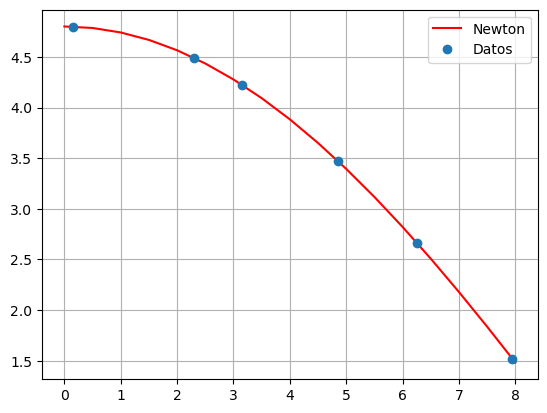

  x    yExacta        yInt       Error(%)
------------------------------------------
 0.0  4.80000000   4.80002509    0.00052280
 0.5  4.78520320   4.78517849    0.00051639
 1.0  4.74090403   4.74087697    0.00057085
 1.5  4.66737562   4.66736070    0.00031966
 2.0  4.56507128   4.56506686    0.00009671
 2.5  4.43462176   4.43462106    0.00001572
 3.0  4.27683132   4.27682865    0.00006232
 3.5  4.09267279   4.09266615    0.00016227
 4.0  3.88328157   3.88327258    0.00023171
 4.5  3.64994863   3.64994085    0.00021336
 5.0  3.39411255   3.39410914    0.00010051
 5.5  3.11735063   3.11735225    0.00005203
 6.0  2.82136921   2.82137301    0.00013448
 6.5  2.50799311   2.50799358    0.00001863
 7.0  2.17915440   2.17914691    0.00034380
 7.5  1.83688048   1.83686805    0.00067665
 8.0  1.48328157   1.48328554    0.00026758


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

xData = np.array([0.15, 2.30, 3.15, 4.85, 6.25, 7.95])
yData = np.array([4.79867, 4.49013, 4.2243, 3.47313, 2.66674, 1.51909])
coeff = coeffts(xData, yData)
x = np.arange(0, 8.5, 0.5)
plt.plot(x, evalPoly(coeff, xData, x), "r", label="Newton")
plt.plot(xData, yData, "o", label="Datos")
plt.legend()
plt.grid()
plt.show()
print("  x    yExacta        yInt       Error(%)")
print("------------------------------------------")
for i in range(len(x)):
    y = evalPoly(coeff, xData, x[i])
    yExacta = 4.8 * cos(pi * x[i] / 20)
    Error = abs(((yExacta - y) / yExacta) * 100)
    print(" %.1f  %.8f   %.8f    %.8f" % (x[i], yExacta, y, Error))

In [ ]:
# Construir el polinomio de interpolación simbólicamente
import sympy as sp

x = sp.symbols("x")
a = coeffts(np.array(xData), np.array(yData))
p = a[0]
for k in range(1, len(xData)):
    p = a[k] + (x - xData[k]) * p
    p_simp = sp.expand(p)

# Imprimir el polinomio de interpolación
print("Polinomio de Interpolación de Newton:")
print(f"y(x) = {p}")
print("\nPolinomio Simplificado:")
print(f"y(x) = {p_simp}")

Polinomio de Interpolación de Newton:
y(x) = (x - 7.95)*((x - 6.25)*((x - 4.85)*((x - 3.15)*(4.79867*x - 11.1804479767442) - 0.0564113999088004) + 0.00122866419321444) + 0.000104432831275827) - 2.30081527502247e-6

Polinomio Simplificado:
y(x) = 4.79867*x**5 - 117.710921976744*x**4 + 1105.02404223381*x**3 - 4943.85802126987*x**2 + 10505.6888538722*x - 8473.43231121132


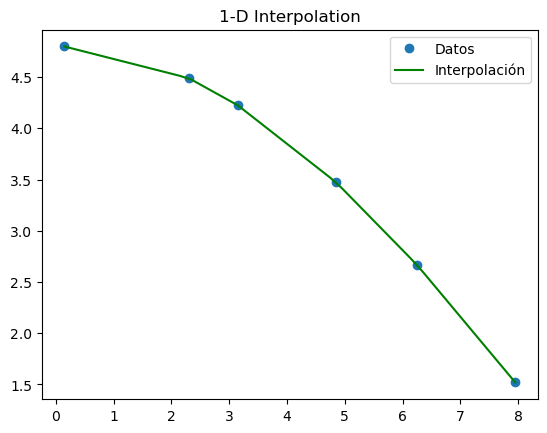

In [7]:
from scipy import interpolate


# Interpolation
temp = interpolate.interp1d(xData, yData)
xnew = np.arange(0.15, 8, 0.2)
ynew = temp(xnew)

plt.title("1-D Interpolation")
plt.plot(xData, yData, "o", label="Datos")
plt.plot(xnew, ynew, "-", color="green", label="Interpolación")
plt.legend()
plt.show()